In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from seal.trainer.communication import COMM_TYPES

RANKED = [True, False]
TRAINERS = ["FedRL", "MARL", "SARL"]

In [3]:
data = {
    "ranked": [],
    "trainer": [],
    "comm_cost": [],
    "comm_type": []
}

In [4]:
for i in range(100):
    for comm_type in COMM_TYPES:
        for trainer in TRAINERS:
            for ranked in RANKED:
                if comm_type == "tls-to-edge-obs-comms" and \
                trainer != "SARL":
                   comm_cost = 0
                else:
                    comm_cost = random.randint(10, 100)
                
                data["ranked"].append(ranked)
                data["trainer"].append(trainer)
                data["comm_cost"].append(comm_cost)
                data["comm_type"].append(comm_type)

In [5]:
df = pd.DataFrame.from_dict(data)
df.head()

,ranked,trainer,comm_cost,comm_type
0,True,FedRL,57,veh-to-tls-info-comms
1,False,FedRL,21,veh-to-tls-info-comms
2,True,MARL,60,veh-to-tls-info-comms
3,False,MARL,100,veh-to-tls-info-comms
4,True,SARL,13,veh-to-tls-info-comms


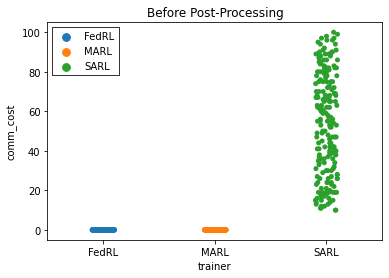

In [8]:
sns.stripplot(
    data=df.query("comm_type == 'tls-to-edge-obs-comms'"),
    x="trainer",
    hue="trainer",
    y="comm_cost"
)
plt.title("Before Post-Processing")
plt.legend(fancybox=False, edgecolor="black")
plt.show()

In [ ]:
# def post_processing(row):
#     if row["ranked"] is True:
#         row[]


df2 = df.copy()
# df2 = df2.apply(post_processing, axis=1)
df2.mask(df2["ranked"], )

In [ ]:
sns.stripplot(
    data=df2.query("comm_type == 'tls-to-edge-obs-comms'"),
    x="trainer",
    hue="trainer",
    y="comm_cost"
)
plt.title("Before Post-Processing")
plt.legend(fancybox=False, edgecolor="black")
plt.show()